In [1]:
#Core
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Metrics
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import  precision_recall_curve, roc_curve, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix


In [2]:
df=pd.read_csv('C:\\Users\Renato\OneDrive\Projeto_TERA\Predição Acidentes Motocicleta\Projeto-TERA-Data-Science---Acidentes-Motocicletas\CSVs\df_acidentes_sp_moto_CLEAN.csv',sep=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53235 entries, 0 to 53234
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ano                   53235 non-null  int64  
 1   Mes                   53235 non-null  int64  
 2   Dia                   53235 non-null  int64  
 3   Dia da Semana         53235 non-null  object 
 4   Turno                 53235 non-null  object 
 5   Município             53235 non-null  object 
 6   Jurisdição            53235 non-null  object 
 7   Administração         53235 non-null  object 
 8   Conservação           53235 non-null  object 
 9   Latitude              53235 non-null  float64
 10  Longitude             53235 non-null  float64
 11  Condições Climáticas  53235 non-null  object 
 12  Iluminação            53235 non-null  object 
 13  Mão de direção        53235 non-null  object 
 14  Relevo                53235 non-null  object 
 15  Superfície da via  

In [4]:
df.columns

Index(['Ano', 'Mes', 'Dia', 'Dia da Semana', 'Turno', 'Município',
       'Jurisdição', 'Administração', 'Conservação', 'Latitude', 'Longitude',
       'Condições Climáticas', 'Iluminação', 'Mão de direção', 'Relevo',
       'Superfície da via', 'Tipo de pavimento', 'Tipo de pista', 'Traçado',
       'Tipo de Via', 'Acidente Fatal', 'Mes_sin', 'Mes_cos',
       'dias_semana_num', 'dias_semana_norm', 'dias_semana_sin',
       'dias_semana_cos', 'Hora', 'Minuto', 'horario_float', 'horario_sin',
       'horario_cos'],
      dtype='object')

In [5]:
# escolhendo colunas
df1 = df[['Acidente Fatal','Ano','Turno','Município','Jurisdição','Administração','Conservação',
    'Latitude', 'Longitude','Condições Climáticas', 'Iluminação', 'Mão de direção', 
    'Relevo','Superfície da via', 'Tipo de pavimento', 'Tipo de pista', 'Traçado',
    'Tipo de Via','Mes_sin', 'Mes_cos','dias_semana_sin','dias_semana_cos',
    'horario_sin','horario_cos']]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53235 entries, 0 to 53234
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Acidente Fatal        53235 non-null  int64  
 1   Ano                   53235 non-null  int64  
 2   Turno                 53235 non-null  object 
 3   Município             53235 non-null  object 
 4   Jurisdição            53235 non-null  object 
 5   Administração         53235 non-null  object 
 6   Conservação           53235 non-null  object 
 7   Latitude              53235 non-null  float64
 8   Longitude             53235 non-null  float64
 9   Condições Climáticas  53235 non-null  object 
 10  Iluminação            53235 non-null  object 
 11  Mão de direção        53235 non-null  object 
 12  Relevo                53235 non-null  object 
 13  Superfície da via     53235 non-null  object 
 14  Tipo de pavimento     53235 non-null  object 
 15  Tipo de pista      

In [7]:
#dividindo as categoris
target = 'Acidente Fatal',

cat_features = [
    'Turno','Município','Jurisdição','Administração','Conservação',
    'Condições Climáticas', 'Iluminação', 'Mão de direção', 
    'Relevo','Superfície da via', 'Tipo de pavimento', 'Tipo de pista', 'Traçado',
    'Tipo de Via'
]

num_features = ['Ano','Latitude', 'Longitude','Mes_sin', 'Mes_cos','dias_semana_sin','dias_semana_cos','horario_sin','horario_cos' #passar um scale nessas variáveis?
]

### Pre-processamento

In [8]:
df_proc = pd.get_dummies(df1,columns=cat_features)
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53235 entries, 0 to 53234
Columns: 112 entries, Acidente Fatal to Tipo de Via_Vias Municipais
dtypes: float64(8), int64(2), uint8(102)
memory usage: 9.2 MB


In [9]:
proporcao = df1['Acidente Fatal'].value_counts()[1]/(len(df1))
print('Proporção de fatais:', round(proporcao,2)*100, '%')

Proporção de fatais: 8.0 %


### Splitando os dados
-Definir melhor % de treino e teste

-Fazer por validação cruzada?

-entender melhor o stratify...é pra tudo ou só pra variavel target?

In [10]:
#features
X = df_proc.drop('Acidente Fatal',axis=1)
#target variable
y = df_proc['Acidente Fatal']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

### Balanceamento

-Usando Random Oversampling

-Usando Ramdom Undersampling

-Usando SMOTE (Synthetic Minority OverSampling Technique)

Comparar os tipos de balanceamento usando RegLog ou Random forest?

In [11]:
### Balanceamento usando Randon Oversample
randOverSampler = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = randOverSampler.fit_resample(X_train, y_train)
#confirmando valores
y_train_ros.value_counts()


0    32894
1    32894
Name: Acidente Fatal, dtype: int64

In [12]:
### Balanceamento usando Randon Undersample
randUnderSampler = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = randUnderSampler.fit_resample(X_train, y_train)
#confirmando valores
y_train_rus.value_counts()

0    2773
1    2773
Name: Acidente Fatal, dtype: int64

In [13]:
### Balanceamento usando SMOTE
smote = SMOTE(sampling_strategy=0.2) #testar com proporções diferentes?
X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)
#confirmando valores
y_train_smt.value_counts()

0    32894
1     6578
Name: Acidente Fatal, dtype: int64

In [14]:
y_train.value_counts()

0    32894
1     2773
Name: Acidente Fatal, dtype: int64

# Comparando balanceamentos usando Reg Log

In [15]:
#train
model_base = LogisticRegression(max_iter=2000,random_state=42) #definindo o classificador
mdl_base = model_base.fit(X_train,y_train)#treinando o modelo

model_balanced = LogisticRegression(max_iter=2000,random_state=42,class_weight='balanced') #definindo o classificador
mdl_balanced = model_balanced.fit(X_train,y_train)#treinando o modelo

model_ros = LogisticRegression(max_iter=2000,random_state=42) #definindo o classificador
mdl_ros = model_ros.fit(X_train_ros,y_train_ros)#treinando o modelo

model_rus = LogisticRegression(max_iter=2000,random_state=42) #definindo o classificador
mdl_rus = model_rus.fit(X_train_rus,y_train_rus)#treinando o modelo

model_smt = LogisticRegression(max_iter=2000,random_state=42) #definindo o classificador
mdl_smt = model_smt.fit(X_train_smt,y_train_smt)#treinando o modelo


In [16]:
# Get predicted class, treshold 0.5
y_pred_base = mdl_base.predict(X_test)
y_pred_balanced = mdl_balanced.predict(X_test)
y_pred_ros = mdl_ros.predict(X_test)
y_pred_rus = mdl_rus.predict(X_test)
y_pred_smt = mdl_smt.predict(X_test)

# Get predicted probabilities
y_pred_probs_base = mdl_base.predict_proba(X_test)
y_pred_probs_balanced = mdl_balanced.predict_proba(X_test)
y_pred_probs_ros = mdl_ros.predict_proba(X_test)
y_pred_probs_rus = mdl_rus.predict_proba(X_test)
y_pred_probs_smt = mdl_smt.predict_proba(X_test)


C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


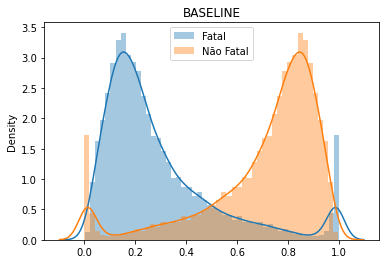

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


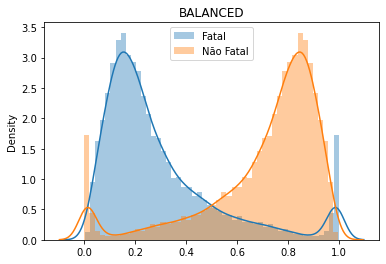

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


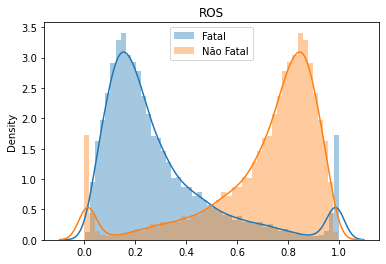

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


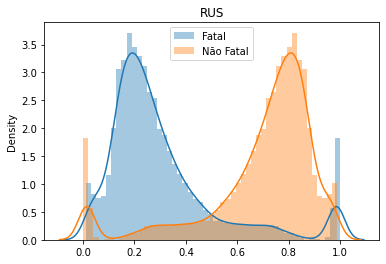

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


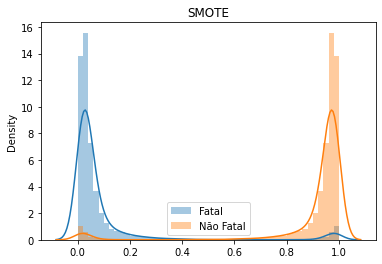

In [17]:
chart_yprob_base = sns.distplot(y_pred_probs_ros[:,1], label='Fatal')
chart_yprob_base = sns.distplot(y_pred_probs_ros[:,0], label='Não Fatal')
plt.legend()
chart_yprob_base.set_title('BASELINE')
plt.show()

chart_yprob_balanced = sns.distplot(y_pred_probs_ros[:,1], label='Fatal')
chart_yprob_balanced = sns.distplot(y_pred_probs_ros[:,0], label='Não Fatal')
plt.legend()
chart_yprob_balanced.set_title('BALANCED')
plt.show()

chart_yprob_ros = sns.distplot(y_pred_probs_ros[:,1], label='Fatal')
chart_yprob_ros = sns.distplot(y_pred_probs_ros[:,0], label='Não Fatal')
plt.legend()
chart_yprob_ros.set_title('ROS')
plt.show()

chart_yprob_rus = sns.distplot(y_pred_probs_rus[:,1], label='Fatal')
chart_yprob_rus = sns.distplot(y_pred_probs_rus[:,0], label='Não Fatal')
plt.legend()
chart_yprob_rus.set_title('RUS')
plt.show()

chart_yprob_smt = sns.distplot(y_pred_probs_smt[:,1], label='Fatal')
chart_yprob_smt = sns.distplot(y_pred_probs_smt[:,0], label='Não Fatal')
plt.legend()
chart_yprob_smt.set_title('SMOTE')
plt.show()

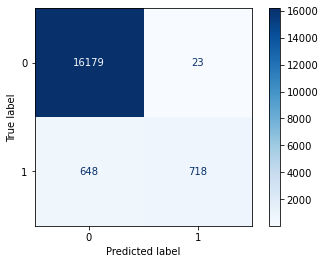

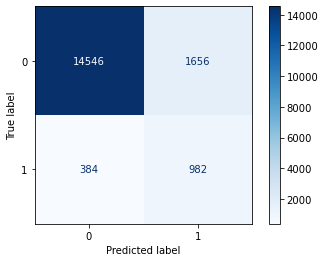

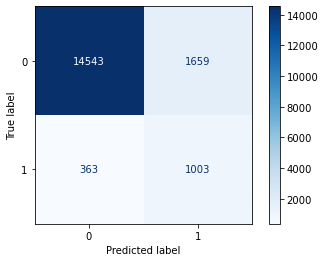

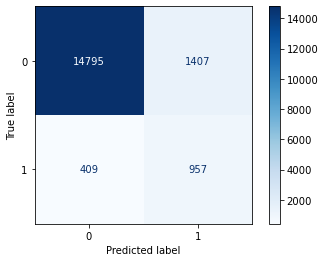

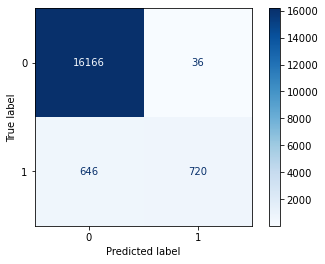

In [18]:
plot_confusion_matrix(model_base, X_test, y_test, cmap='Blues')
plot_confusion_matrix(model_balanced, X_test, y_test, cmap='Blues')
plot_confusion_matrix(model_ros, X_test, y_test, cmap='Blues')
plot_confusion_matrix(model_rus, X_test, y_test, cmap='Blues')
plot_confusion_matrix(model_smt, X_test, y_test, cmap='Blues')#interpretar as matrizes

In [19]:
def compare_models():
    fig = plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PR Curve')

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve')

    models = [model_base,model_balanced,model_rus, model_ros, model_smt]
    names =  ['base','balanced','rus', 'ros', 'smote']
    avg_p = []
    roc_auc = []
    for model,name, k in zip(models, names, 'bgrcmykw'):
        pred_prob = model.predict_proba(X_test)[:,1]
        p,r,_ = precision_recall_curve(y_test,pred_prob)

        roc_auc.append(round(roc_auc_score(y_test, pred_prob), 3))
        avg_p.append(round(average_precision_score(y_test, pred_prob), 3))

        tpr,fpr,_ = roc_curve(y_test,pred_prob)
        ax1.plot(r,p,c=k,label=name, alpha=0.8,  linewidth=0.7)
        ax2.plot(tpr,fpr,c=k,label=name, alpha=0.8,  linewidth=0.7)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

    ax1.legend(loc='lower right')    
    ax2.legend(loc='lower right')
    
    plt.show()
    return  pd.DataFrame({'models' : names, 'avg. precision': avg_p, 'roc auc': roc_auc})

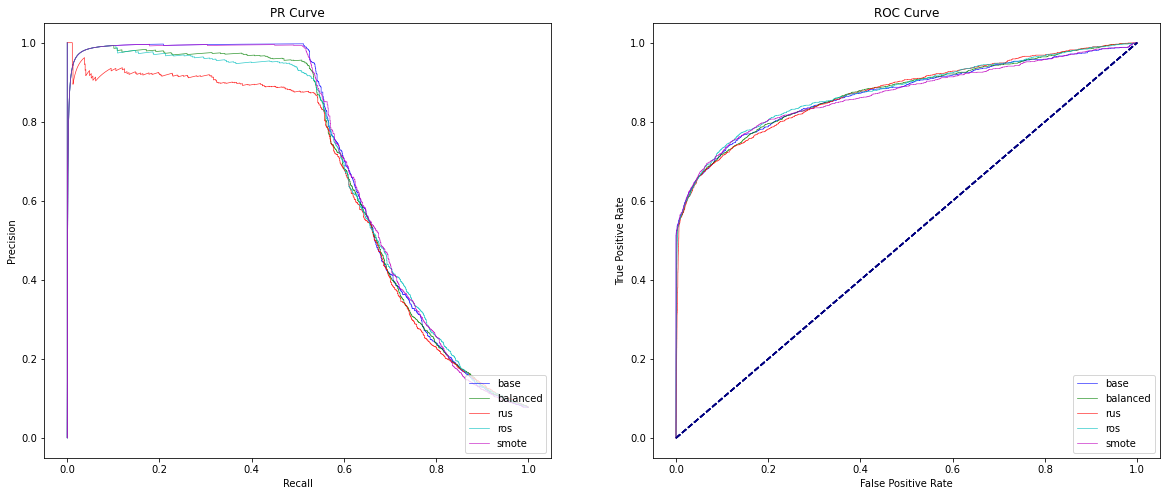

In [20]:
compare_df = compare_models()

In [21]:
compare_df

,models,avg. precision,roc auc
0,base,0.698,0.871
1,balanced,0.685,0.873
2,rus,0.651,0.873
3,ros,0.685,0.877
4,smote,0.700,0.869


In [22]:
print('For BASELINE')
print('Accuracy:', accuracy_score(y_test, y_pred_base))
print('Precision:', precision_score(y_test, y_pred_base))
print('Recall:', recall_score(y_test, y_pred_base))
print('F1-Score:', f1_score(y_test, y_pred_base))
print()
print('For BALANCED')
print('Accuracy:', accuracy_score(y_test, y_pred_balanced))
print('Precision:', precision_score(y_test, y_pred_balanced))
print('Recall:', recall_score(y_test, y_pred_balanced))
print('F1-Score:', f1_score(y_test, y_pred_balanced))
print()
print('For ROS')
print('Accuracy:', accuracy_score(y_test, y_pred_ros))
print('Precision:', precision_score(y_test, y_pred_ros))
print('Recall:', recall_score(y_test, y_pred_ros))
print('F1-Score:', f1_score(y_test, y_pred_ros))
print()
print('For RUS')
print('Accuracy:', accuracy_score(y_test, y_pred_rus))
print('Precision:', precision_score(y_test, y_pred_rus))
print('Recall:', recall_score(y_test, y_pred_rus))
print('F1-Score:', f1_score(y_test, y_pred_rus))
print()
print('For SMOTE')
print('Accuracy:', accuracy_score(y_test, y_pred_smt))
print('Precision:', precision_score(y_test, y_pred_smt))
print('Recall:', recall_score(y_test, y_pred_smt))
print('F1-Score:', f1_score(y_test, y_pred_smt))



For BASELINE
Accuracy: 0.9618055555555556
Precision: 0.9689608636977058
Recall: 0.5256222547584187
F1-Score: 0.6815377313716185

For BALANCED
Accuracy: 0.8838797814207651
Precision: 0.37225170583775585
Recall: 0.718887262079063
F1-Score: 0.4905094905094905

For ROS
Accuracy: 0.8849043715846995
Precision: 0.37678437265214126
Recall: 0.7342606149341142
F1-Score: 0.49801390268123136

For RUS
Accuracy: 0.8966302367941712
Precision: 0.40482233502538073
Recall: 0.7005856515373353
F1-Score: 0.5131367292225202

For SMOTE
Accuracy: 0.96117941712204
Precision: 0.9523809523809523
Recall: 0.527086383601757
F1-Score: 0.6786050895381716


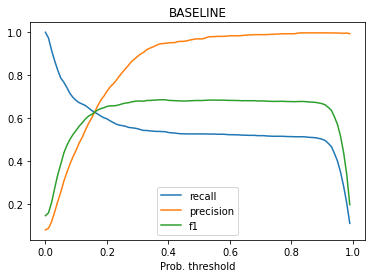

In [23]:
# PR GRaph for BASELINE
precisions = []
recalls = []
f1s=[]
for i in range(100):
    threshold_prob = i/100
    y_hat = (mdl_base.predict_proba(X_test)[:,1] >= threshold_prob).astype(bool)
    
    precision = precision_score(y_test.values, y_hat)
    recall = recall_score(y_test.values, y_hat)
    f1 = f1_score(y_test.values, y_hat)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
probs = [i/100 for i in range(100)]
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
sns.lineplot(x=probs, y=f1s, label='f1')
plt.xlabel('Prob. threshold')
plt.title('BASELINE')
plt.show()

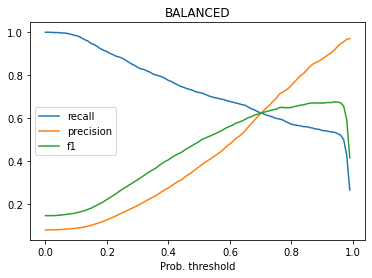

In [24]:
# PR GRaph for BALANCED
precisions = []
recalls = []
f1s=[]
for i in range(100):
    threshold_prob = i/100
    y_hat = (mdl_balanced.predict_proba(X_test)[:,1] >= threshold_prob).astype(bool)
    
    precision = precision_score(y_test.values, y_hat)
    recall = recall_score(y_test.values, y_hat)
    f1 = f1_score(y_test.values, y_hat)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
probs = [i/100 for i in range(100)]
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
sns.lineplot(x=probs, y=f1s, label='f1')
plt.xlabel('Prob. threshold')
plt.title('BALANCED')
plt.show()

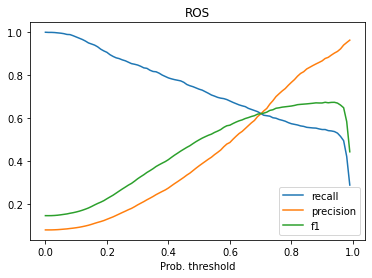

In [25]:
# PR GRaph for ROS
precisions = []
recalls = []
f1s=[]
for i in range(100):
    threshold_prob = i/100
    y_hat = (mdl_ros.predict_proba(X_test)[:,1] >= threshold_prob).astype(bool)
    
    precision = precision_score(y_test.values, y_hat)
    recall = recall_score(y_test.values, y_hat)
    f1 = f1_score(y_test.values, y_hat)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
probs = [i/100 for i in range(100)]
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
sns.lineplot(x=probs, y=f1s, label='f1')
plt.xlabel('Prob. threshold')
plt.title('ROS')
plt.show()

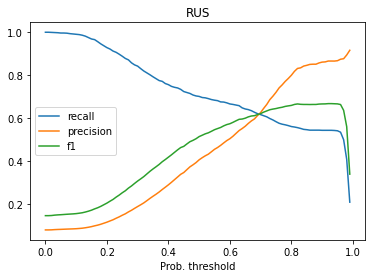

In [26]:
# PR GRaph for RUS
precisions = []
recalls = []
f1s=[]
for i in range(100):
    threshold_prob = i/100
    y_hat = (mdl_rus.predict_proba(X_test)[:,1] >= threshold_prob).astype(bool)
    
    precision = precision_score(y_test.values, y_hat)
    recall = recall_score(y_test.values, y_hat)
    f1 = f1_score(y_test.values, y_hat)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
probs = [i/100 for i in range(100)]
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
sns.lineplot(x=probs, y=f1s, label='f1')
plt.xlabel('Prob. threshold')
plt.title('RUS')
plt.show()

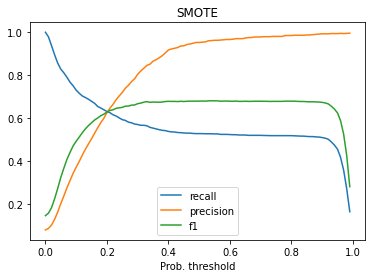

In [27]:
# PR GRaph for SMOTE
precisions = []
recalls = []
f1s=[]
for i in range(100):
    threshold_prob = i/100
    y_hat = (mdl_smt.predict_proba(X_test)[:,1] >= threshold_prob).astype(bool)
    
    precision = precision_score(y_test.values, y_hat)
    recall = recall_score(y_test.values, y_hat)
    f1 = f1_score(y_test.values, y_hat)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
probs = [i/100 for i in range(100)]
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
sns.lineplot(x=probs, y=f1s, label='f1')
plt.xlabel('Prob. threshold')
plt.title('SMOTE')
plt.show()

# Comparando balanceamentos usando Random Forest

In [28]:
# #gridsearch para class weight
# weights = np.linspace(0.0,0.99,20)

# model_grid_rf = RandomForestClassifier(random_state=42,max_depth=4)

# #Creating a dictionary grid for grid search
# param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# #Fitting grid search to the train data with 5 folds
# gridsearch = GridSearchCV(estimator= model_grid_rf, 
#                           param_grid= param_grid,
#                           cv=StratifiedKFold(), 
#                           n_jobs=-1, 
#                           scoring='f1', 
#                           verbose=2).fit(X_train, y_train)

# #Ploting the score for different values of weight
# sns.set_style('whitegrid')
# plt.figure(figsize=(12,8))
# weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
# sns.lineplot(weigh_data['weight'], weigh_data['score'])
# plt.xlabel('Weight for class 1')
# plt.ylabel('F1 score')
# plt.xticks([round(i/10,1) for i in range(0,11,1)])
# plt.title('Scoring for different class weights', fontsize=24)


In [41]:
#train
model_base_rf = RandomForestClassifier(random_state=42,max_depth=5) #definindo o classificador
mdl_base_rf = model_base_rf.fit(X_train,y_train)#treinando o modelo

model_balanced_rf = RandomForestClassifier(random_state=42,class_weight='balanced',max_depth=5) #definindo o classificador
mdl_balanced_rf = model_balanced_rf.fit(X_train,y_train)#treinando o modelo

model_ros_rf = RandomForestClassifier(random_state=42,max_depth=5) #definindo o classificador
mdl_ros_rf = model_ros_rf.fit(X_train_ros,y_train_ros)#usando x e y 

model_rus_rf = RandomForestClassifier(random_state=42,max_depth=5) #definindo o classificador
mdl_rus_rf = model_rus_rf.fit(X_train_rus,y_train_rus)#treinando o modelo

model_smt_rf = RandomForestClassifier(random_state=42,max_depth=5) #definindo o classificador
mdl_smt_rf = model_smt_rf.fit(X_train_smt,y_train_smt)#treinando o modelo

In [42]:
# Get predicted class, treshold 0.5
y_pred_base_rf = mdl_base_rf.predict(X_test)
y_pred_balanced_rf = mdl_balanced_rf.predict(X_test)
y_pred_ros_rf = mdl_ros_rf.predict(X_test)
y_pred_rus_rf = mdl_rus_rf.predict(X_test)
y_pred_smt_rf = mdl_smt_rf.predict(X_test)

# Get predicted probabilities
y_pred_probs_base_rf = mdl_base_rf.predict_proba(X_test)
y_pred_probs_balanced_rf = mdl_balanced_rf.predict_proba(X_test)
y_pred_probs_ros_rf = mdl_ros_rf.predict_proba(X_test)
y_pred_probs_rus_rf = mdl_rus_rf.predict_proba(X_test)
y_pred_probs_smt_rf = mdl_smt_rf.predict_proba(X_test)

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


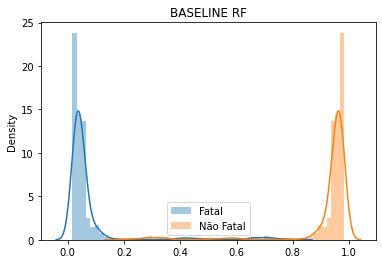

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


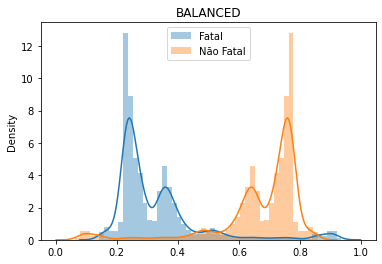

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


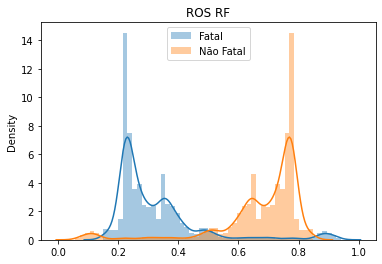

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


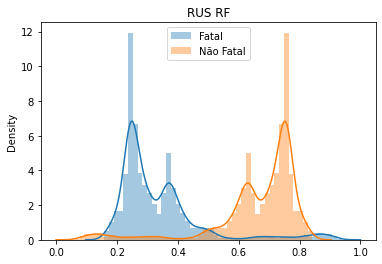

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


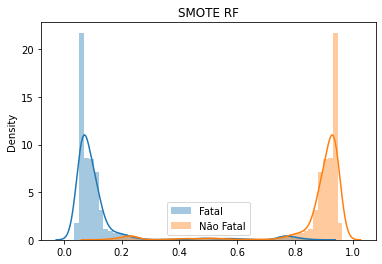

In [43]:
chart_yprob_base_rf = sns.distplot(y_pred_probs_base_rf[:,1], label='Fatal')
chart_yprob_base_rf = sns.distplot(y_pred_probs_base_rf[:,0], label='Não Fatal')
plt.legend()
chart_yprob_base_rf.set_title('BASELINE RF')
plt.show()

chart_yprob_balanced_rf = sns.distplot(y_pred_probs_balanced_rf[:,1], label='Fatal')
chart_yprob_balanced_rf = sns.distplot(y_pred_probs_balanced_rf[:,0], label='Não Fatal')
plt.legend()
chart_yprob_balanced_rf.set_title('BALANCED')
plt.show()

chart_yprob_ros_rf = sns.distplot(y_pred_probs_ros_rf[:,1], label='Fatal')
chart_yprob_ros_rf = sns.distplot(y_pred_probs_ros_rf[:,0], label='Não Fatal')
plt.legend()
chart_yprob_ros_rf.set_title('ROS RF')
plt.show()

chart_yprob_rus_rf = sns.distplot(y_pred_probs_rus_rf[:,1], label='Fatal')
chart_yprob_rus_rf = sns.distplot(y_pred_probs_rus_rf[:,0], label='Não Fatal')
plt.legend()
chart_yprob_rus_rf.set_title('RUS RF')
plt.show()

chart_yprob_smt_rf = sns.distplot(y_pred_probs_smt_rf[:,1], label='Fatal')
chart_yprob_smt_rf = sns.distplot(y_pred_probs_smt_rf[:,0], label='Não Fatal')
plt.legend()
chart_yprob_smt_rf.set_title('SMOTE RF')
plt.show()

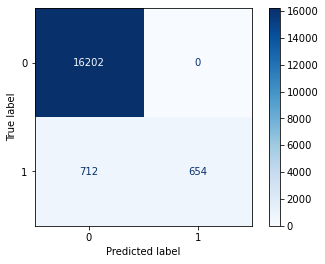

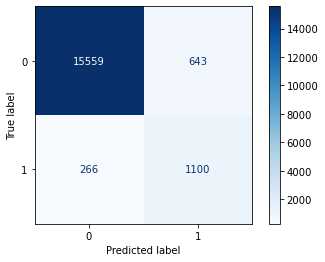

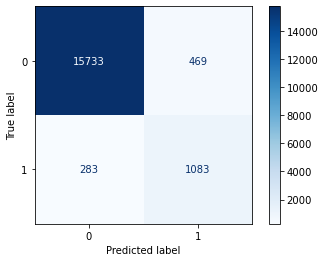

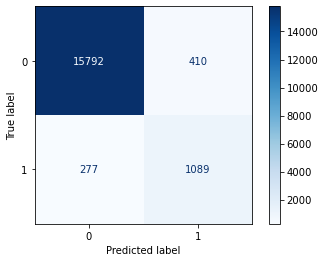

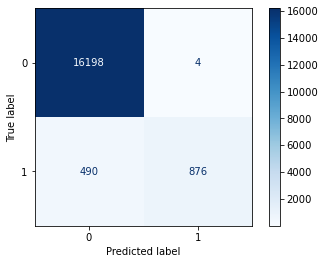

In [44]:
plot_confusion_matrix(model_base_rf, X_test, y_test, cmap='Blues')
plot_confusion_matrix(model_balanced_rf, X_test, y_test, cmap='Blues')
plot_confusion_matrix(model_ros_rf, X_test, y_test, cmap='Blues')
plot_confusion_matrix(model_rus_rf, X_test, y_test, cmap='Blues')
plot_confusion_matrix(model_smt_rf, X_test, y_test, cmap='Blues')

In [45]:
def compare_models_rf():
    fig = plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PR Curve')

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve')

    models = [model_base_rf,model_balanced_rf,model_rus_rf, model_ros_rf, model_smt_rf]
    names =  ['base rf','balanced','rus rf', 'ros rf', 'smote rf']
    avg_p = []
    roc_auc = []
    for model,name, k in zip(models, names, 'bgrcmykw'):
        pred_prob = model.predict_proba(X_test)[:,1]
        p,r,_ = precision_recall_curve(y_test,pred_prob)

        roc_auc.append(round(roc_auc_score(y_test, pred_prob), 3))
        avg_p.append(round(average_precision_score(y_test, pred_prob), 3))

        tpr,fpr,_ = roc_curve(y_test,pred_prob)
        ax1.plot(r,p,c=k,label=name, alpha=0.8,  linewidth=0.7)
        ax2.plot(tpr,fpr,c=k,label=name, alpha=0.8,  linewidth=0.7)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

    ax1.legend(loc='lower right')    
    ax2.legend(loc='lower right')
    
    plt.show()
    return  pd.DataFrame({'models' : names, 'avg. precision': avg_p, 'roc auc': roc_auc})

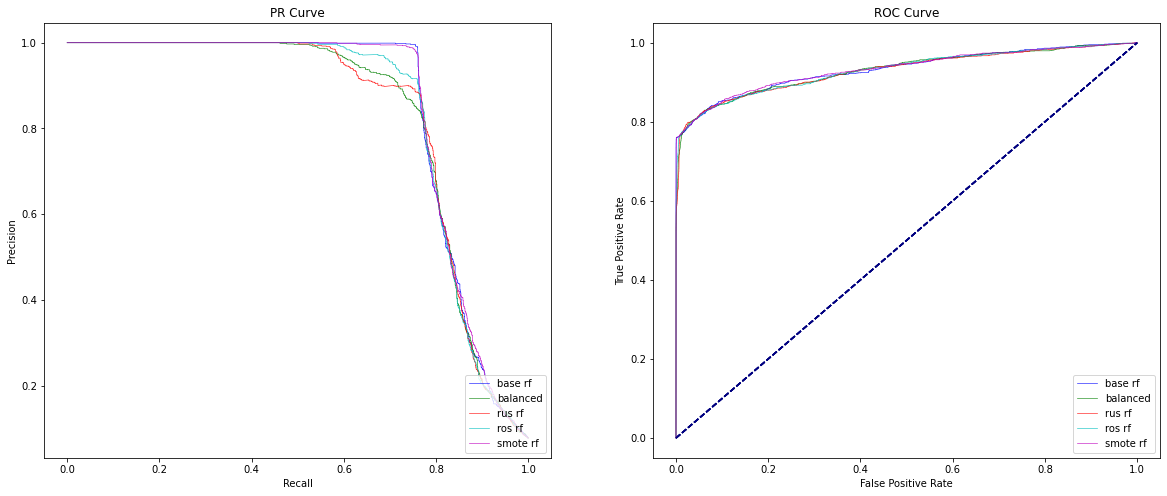

In [46]:
compare_df_rf = compare_models_rf()

In [47]:
compare_df_rf

,models,avg. precision,roc auc
0,base rf,0.846,0.932
1,balanced,0.832,0.930
2,rus rf,0.831,0.929
3,ros rf,0.838,0.930
4,smote rf,0.847,0.933


In [48]:
print('For BASELINE RF')
print('Accuracy:', accuracy_score(y_test, y_pred_base_rf))
print('Precision:', precision_score(y_test, y_pred_base_rf))
print('Recall:', recall_score(y_test, y_pred_base_rf))
print('F1-Score:', f1_score(y_test, y_pred_base_rf))
print()
print('For BALANCED RF')
print('Accuracy:', accuracy_score(y_test, y_pred_balanced_rf))
print('Precision:', precision_score(y_test, y_pred_balanced_rf))
print('Recall:', recall_score(y_test, y_pred_balanced_rf))
print('F1-Score:', f1_score(y_test, y_pred_balanced_rf))
print()
print('For ROS RF')
print('Accuracy:', accuracy_score(y_test, y_pred_ros_rf))
print('Precision:', precision_score(y_test, y_pred_ros_rf))
print('Recall:', recall_score(y_test, y_pred_ros_rf))
print('F1-Score:', f1_score(y_test, y_pred_ros_rf))
print()
print('For RUS RF')
print('Accuracy:', accuracy_score(y_test, y_pred_rus_rf))
print('Precision:', precision_score(y_test, y_pred_rus_rf))
print('Recall:', recall_score(y_test, y_pred_rus_rf))
print('F1-Score:', f1_score(y_test, y_pred_rus_rf))
print()
print('For SMOTE RF')
print('Accuracy:', accuracy_score(y_test, y_pred_smt_rf))
print('Precision:', precision_score(y_test, y_pred_smt_rf))
print('Recall:', recall_score(y_test, y_pred_smt_rf))
print('F1-Score:', f1_score(y_test, y_pred_smt_rf))


For BASELINE RF
Accuracy: 0.9594717668488161
Precision: 1.0
Recall: 0.4787701317715959
F1-Score: 0.6475247524752475

For BALANCED RF
Accuracy: 0.9482581967213115
Precision: 0.6310958118187033
Recall: 0.8052708638360175
F1-Score: 0.7076230299131554

For ROS RF
Accuracy: 0.9571948998178507
Precision: 0.6978092783505154
Recall: 0.7928257686676428
F1-Score: 0.7422892392049348

For RUS RF
Accuracy: 0.9608948087431693
Precision: 0.7264843228819213
Recall: 0.7972181551976574
F1-Score: 0.7602094240837696

For SMOTE RF
Accuracy: 0.9718806921675774
Precision: 0.9954545454545455
Recall: 0.6412884333821376
F1-Score: 0.7800534283170079


In [49]:
# métricas para valores de treino
print('For BASELINE train')
print('Accuracy:', accuracy_score(y_train, mdl_base_rf.predict(X_train)))
print('Precision:', precision_score(y_train, mdl_base_rf.predict(X_train)))
print('Recall:', recall_score(y_train, mdl_base_rf.predict(X_train)))
print('F1-Score:', f1_score(y_train, mdl_base_rf.predict(X_train)))


For BASELINE train
Accuracy: 0.9590938402444837
Precision: 0.9969742813918305
Recall: 0.47529751172015866
F1-Score: 0.6437118437118438


C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages

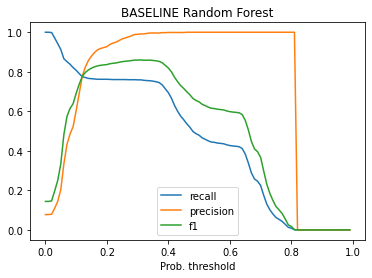

In [50]:
# PR GRaph for BASELINE RF
precisions = []
recalls = []
f1s=[]
for i in range(100):
    threshold_prob = i/100
    y_hat = (mdl_base_rf.predict_proba(X_test)[:,1] >= threshold_prob).astype(bool)
    
    precision = precision_score(y_test.values, y_hat)
    recall = recall_score(y_test.values, y_hat)
    f1 = f1_score(y_test.values, y_hat)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
probs = [i/100 for i in range(100)]
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
sns.lineplot(x=probs, y=f1s, label='f1')
plt.xlabel('Prob. threshold')
plt.title('BASELINE Random Forest')
plt.show()

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages

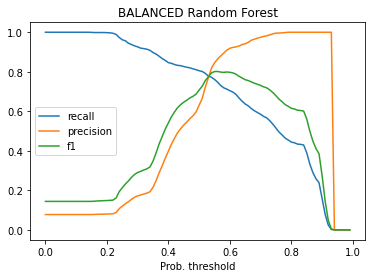

In [51]:
# PR GRaph for BALANCED RF
precisions = []
recalls = []
f1s=[]
for i in range(100):
    threshold_prob = i/100
    y_hat = (mdl_balanced_rf.predict_proba(X_test)[:,1] >= threshold_prob).astype(bool)
    
    precision = precision_score(y_test.values, y_hat)
    recall = recall_score(y_test.values, y_hat)
    f1 = f1_score(y_test.values, y_hat)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
probs = [i/100 for i in range(100)]
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
sns.lineplot(x=probs, y=f1s, label='f1')
plt.xlabel('Prob. threshold')
plt.title('BALANCED Random Forest')
plt.show()

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages

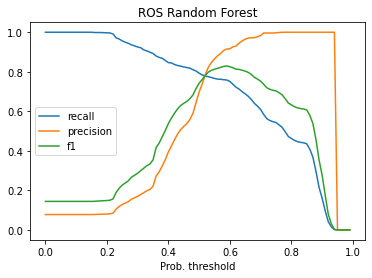

In [52]:
# PR GRaph for ROS RF
precisions = []
recalls = []
f1s=[]
for i in range(100):
    threshold_prob = i/100
    y_hat = (mdl_ros_rf.predict_proba(X_test)[:,1] >= threshold_prob).astype(bool)
    
    precision = precision_score(y_test.values, y_hat)
    recall = recall_score(y_test.values, y_hat)
    f1 = f1_score(y_test.values, y_hat)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
probs = [i/100 for i in range(100)]
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
sns.lineplot(x=probs, y=f1s, label='f1')
plt.xlabel('Prob. threshold')
plt.title('ROS Random Forest')
plt.show()

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages

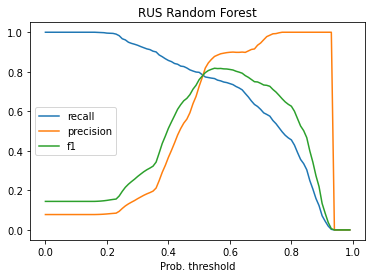

In [53]:
# PR GRaph for RUS
precisions = []
recalls = []
f1s=[]
for i in range(100):
    threshold_prob = i/100
    y_hat = (mdl_rus_rf.predict_proba(X_test)[:,1] >= threshold_prob).astype(bool)
    
    precision = precision_score(y_test.values, y_hat)
    recall = recall_score(y_test.values, y_hat)
    f1 = f1_score(y_test.values, y_hat)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
probs = [i/100 for i in range(100)]
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
sns.lineplot(x=probs, y=f1s, label='f1')
plt.xlabel('Prob. threshold')
plt.title('RUS Random Forest')
plt.show()

C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Renato\anaconda3\envs\Data_Science\lib\site-packages

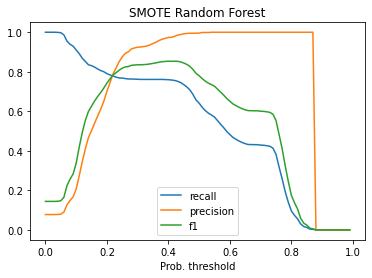

In [54]:
# PR GRaph for SMOTE
precisions = []
recalls = []
f1s=[]
for i in range(100):
    threshold_prob = i/100
    y_hat = (mdl_smt_rf.predict_proba(X_test)[:,1] >= threshold_prob).astype(bool)
    
    precision = precision_score(y_test.values, y_hat)
    recall = recall_score(y_test.values, y_hat)
    f1 = f1_score(y_test.values, y_hat)
    
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
probs = [i/100 for i in range(100)]
sns.lineplot(x=probs, y=recalls, label='recall'); sns.lineplot(x=probs, y=precisions, label='precision')
sns.lineplot(x=probs, y=f1s, label='f1')
plt.xlabel('Prob. threshold')
plt.title('SMOTE Random Forest')
plt.show()

# comparando modelos de Log Reg e Random Forest

In [55]:
def compare_models_all():
    fig = plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PR Curve')

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve')

    models = [model_base,model_balanced, model_ros, model_smt,model_base_rf,model_balanced_rf, model_ros_rf, model_smt_rf]
    names =  ['BASE','BALANCED','ROS','SMOTE','BASE-RF','BALANCED-RF','ROS-RF','SMOTE-RF']
    avg_p = []
    roc_auc = []
    for model,name, k in zip(models, names, 'bgrcmykw'):
        pred_prob = model.predict_proba(X_test)[:,1]
        p,r,_ = precision_recall_curve(y_test,pred_prob)

        roc_auc.append(round(roc_auc_score(y_test, pred_prob), 3))
        avg_p.append(round(average_precision_score(y_test, pred_prob), 3))

        tpr,fpr,_ = roc_curve(y_test,pred_prob)
        ax1.plot(r,p,c=k,label=name, alpha=0.8,  linewidth=0.7)
        ax2.plot(tpr,fpr,c=k,label=name, alpha=0.8,  linewidth=0.7)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

    ax1.legend(loc='lower right')    
    ax2.legend(loc='lower right')
    
    plt.show()
    return  pd.DataFrame({'models' : names, 'avg. precision': avg_p, 'roc auc': roc_auc, 'fi score':f1})

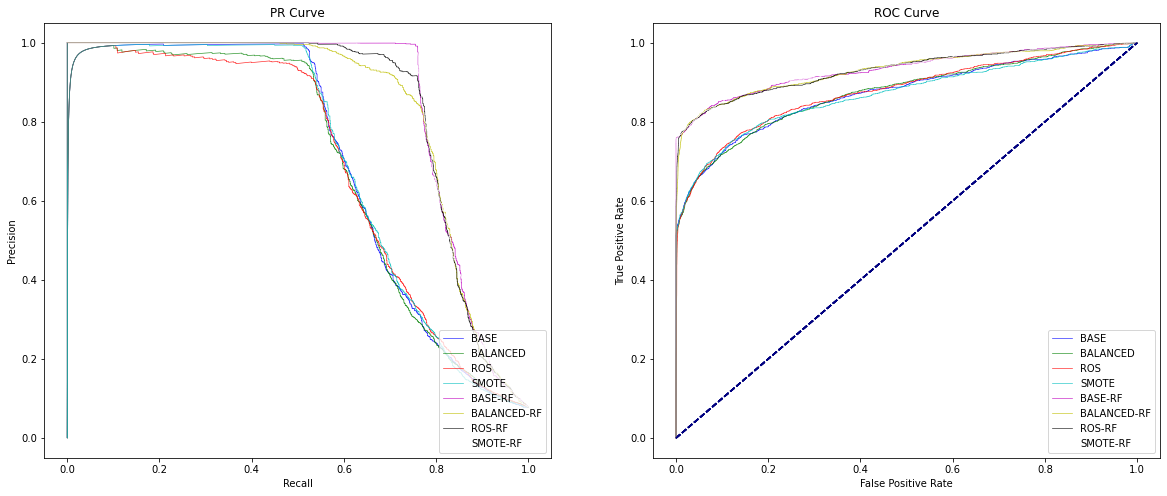

In [56]:
compare_df_all = compare_models_all()

In [57]:
compare_df_all

,models,avg. precision,roc auc,fi score
0,BASE,0.698,0.871,0.0
1,BALANCED,0.685,0.873,0.0
2,ROS,0.685,0.877,0.0
3,SMOTE,0.700,0.869,0.0
4,BASE-RF,0.846,0.932,0.0
5,BALANCED-RF,0.832,0.930,0.0
6,ROS-RF,0.838,0.930,0.0
7,SMOTE-RF,0.847,0.933,0.0


In [58]:
#conclusão: 
# Para escolher o método de balanceamento correto, acho melhor usar o Random Forest pois os resultados do modelo apresentam valores melhores. 
# Entre os resultados da RF, o BASE, SMOT E E ROS ficaram bem próximos, podemos tuanr o SMOTE, 

# Comparando o Random Forest com diferentes class_weights

In [59]:
def check_mutiple_class_weights_ros():
    fig = plt.figure(figsize=(20,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PR Curve for ROS')

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for ROS')

    for w,k in zip([1,2,5,10],'bgrcmykw'):
        #lr_model = LogisticRegression(class_weight={0:1,1:w}, max_iter=2000)
        rf_model_ros = RandomForestClassifier(class_weight={0:1,1:w})
        rf_model_ros.fit(X_train_ros,y_train_ros)
        pred_prob = rf_model_ros.predict_proba(X_test)[:,1]

        p,r,_ = precision_recall_curve(y_test,pred_prob)
        tpr,fpr,_ = roc_curve(y_test,pred_prob)

        ax1.plot(r,p,c=k,label=w)
        ax2.plot(tpr,fpr,c=k,label=w)
    ax1.legend(loc='lower right')    
    ax2.legend(loc='lower right')

    plt.show()

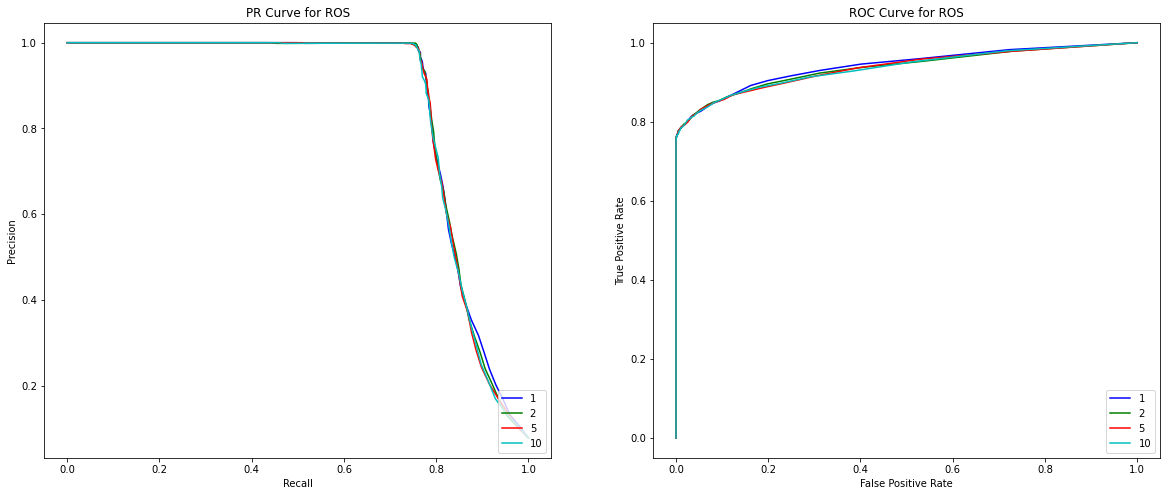

In [60]:
check_mutiple_class_weights_ros()

In [61]:
def check_mutiple_class_weights_smt():
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(1,2,1)
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax1.set_title('PR Curve for SMOTE')

    ax2 = fig.add_subplot(1,2,2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for SMOTE')

    for w,k in zip([1,2,5,10],'bgrcmykw'):
        #lr_model = LogisticRegression(class_weight={0:1,1:w}, max_iter=2000)
        rf_model_smt = RandomForestClassifier(class_weight={0:1,1:w})
        rf_model_smt.fit(X_train_smt,y_train_smt)
        pred_prob = rf_model_smt.predict_proba(X_test)[:,1]

        p,r,_ = precision_recall_curve(y_test,pred_prob)
        tpr,fpr,_ = roc_curve(y_test,pred_prob)

        ax1.plot(r,p,c=k,label=w)
        ax2.plot(tpr,fpr,c=k,label=w)
    ax1.legend(loc='lower right')    
    ax2.legend(loc='lower right')

    plt.show()

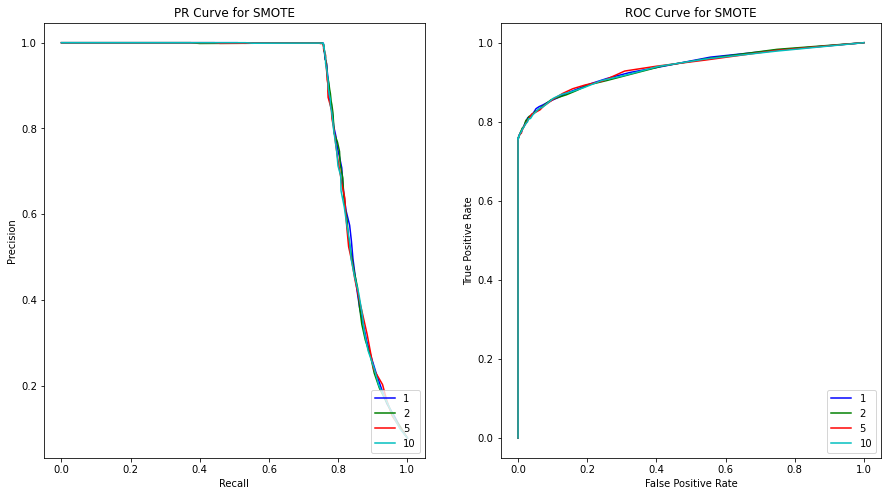

In [62]:
check_mutiple_class_weights_smt()